In [2]:
%matplotlib inline
import pandas as pd
import matplotlib
from matplotlib import pyplot as plt

In [3]:
matplotlib.rcParams['figure.figsize'] = (10, 8)

In [4]:
df = pd.read_csv('heights.csv')

In [6]:
df.sample(10)

,gender,height
3728,Male,68.061487
4882,Male,66.022306
2608,Male,74.016897
4288,Male,75.184795
812,Male,66.682243
8429,Female,64.325705
1688,Male,73.541184
8197,Female,64.942545
5041,Female,66.872742
8196,Female,66.529493


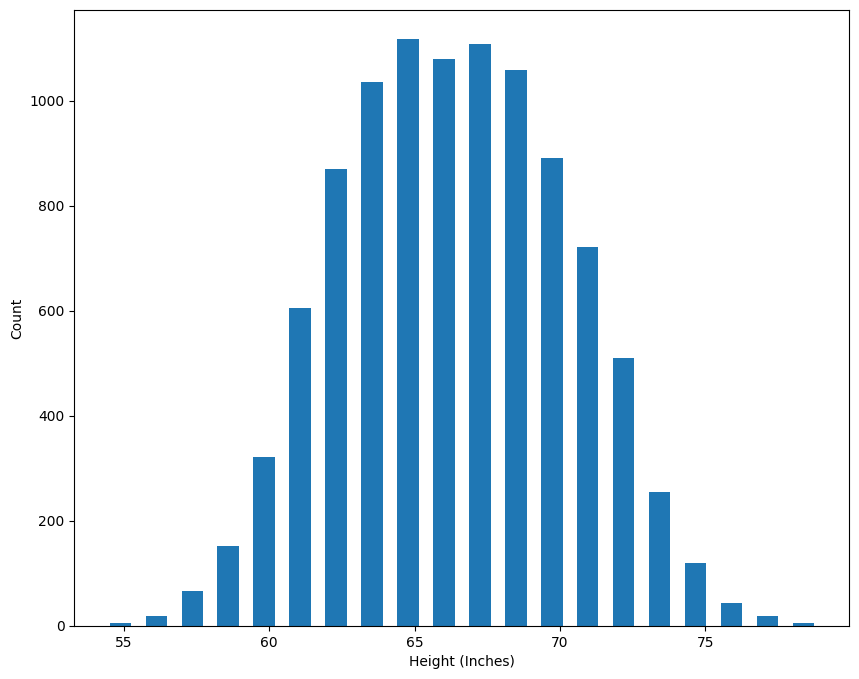

In [7]:
plt.hist(df.height, bins=20, rwidth=0.6)
plt.xlabel('Height (Inches)')
plt.ylabel('Count')
plt.show()

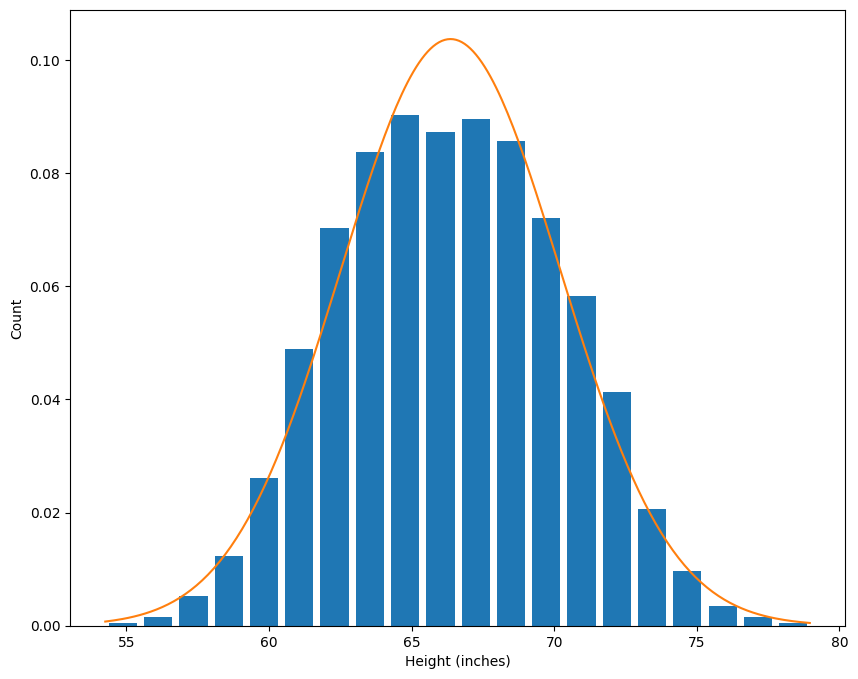

In [9]:
from scipy.stats import norm
import numpy as np
plt.hist(df.height, bins=20, rwidth=0.8, density=True)
plt.xlabel('Height (inches)')
plt.ylabel('Count')

rng = np.arange(df.height.min(), df.height.max(), 0.1)
plt.plot(rng, norm.pdf(rng, df.height.mean(), df.height.std()))

In [10]:
df.height.mean()

66.367559754866

In [11]:
df.height.std()

3.847528120795573

### Outlier detection and removal using 3 standard deviation

In [12]:
upper = df.height.mean() + 3 * df.height.std()
upper

77.91014411725271

In [13]:
lower = df.height.mean() - 3 * df.height.std()
lower

54.824975392479274

In [18]:
df.shape

(10000, 2)

#### Both ways are correct

In [19]:
df[(df.height > upper) | (df.height < lower)]

,gender,height
994,Male,78.095867
1317,Male,78.462053
2014,Male,78.998742
3285,Male,78.528210
3757,Male,78.621374
6624,Female,54.616858
9285,Female,54.263133


In [16]:
df[(df.height < upper) & (df.height > lower)]

,gender,height
0,Male,73.847017
1,Male,68.781904
2,Male,74.110105
3,Male,71.730978
4,Male,69.881796
...,...,...
9995,Female,66.172652
9996,Female,67.067155
9997,Female,63.867992
9998,Female,69.034243


In [20]:
no_outliers = df[(df.height < upper) & (df.height > lower)]
no_outliers.head()

,gender,height
0,Male,73.847017
1,Male,68.781904
2,Male,74.110105
3,Male,71.730978
4,Male,69.881796


In [21]:
no_outliers.shape

(9993, 2)

### Outlier detection and removal using Z Score
Z score is a way to achieve same thing that we did above.

Z score indicates how many standard deviation a data point is away.

For example in our case mean is 66.37 and standard deviation is 3.84.

If a value of a data point is 77.89 then Z score for that is 3 because, it's 3 standard deviation away (77.89 = 66.37 + 3 * 3.84)

In [23]:
66.37 + 3 * 3.84

77.89

In [24]:
df['z_score'] = (df.height - df.height.mean()) / df.height.std()
df.head()

,gender,height,z_score
0,Male,73.847017,1.943964
1,Male,68.781904,0.627505
2,Male,74.110105,2.012343
3,Male,71.730978,1.393991
4,Male,69.881796,0.913375


In [25]:
(73.84 - 66.37) / 3.84

1.9453124999999998

#### Get data points that has z score higher than 3 or lower than - 3. 
Another way of saying same thing is to get the data points that are more than 3 standard deviation away

In [26]:
df[df['z_score'] > 3]

,gender,height,z_score
994,Male,78.095867,3.048271
1317,Male,78.462053,3.143445
2014,Male,78.998742,3.282934
3285,Male,78.528210,3.160640
3757,Male,78.621374,3.184854


In [27]:
df[df['z_score'] < -3]

,gender,height,z_score
6624,Female,54.616858,-3.054091
9285,Female,54.263133,-3.146027


In [28]:
df[(df['z_score'] > 3) | (df['z_score'] < -3)]

,gender,height,z_score
994,Male,78.095867,3.048271
1317,Male,78.462053,3.143445
2014,Male,78.998742,3.282934
3285,Male,78.528210,3.160640
3757,Male,78.621374,3.184854
6624,Female,54.616858,-3.054091
9285,Female,54.263133,-3.146027


In [31]:
no_outliers_1 = df[(df['z_score'] > -3) & (df['z_score'] < 3)]
no_outliers_1.head()

,gender,height,z_score
0,Male,73.847017,1.943964
1,Male,68.781904,0.627505
2,Male,74.110105,2.012343
3,Male,71.730978,1.393991
4,Male,69.881796,0.913375


In [32]:
df.shape

(10000, 3)

In [33]:
no_outliers_1.shape

(9993, 3)